# mammographic_masses analysis (유방 뢴트겐 조영 집단 분석???)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# data load
# data에는 컬럼이 지정되어 있지 않아, 각 컬럼별 [유방결절 평가, 나이, 유방 질량의 모양, 여백, 밀도, 심각도] 지정를 해준다.
columns = ['BI_RADS', 'age', 'shape', 'margin', 'density','severity']
data = pd.read_csv('mammographic_masses.data.txt', names = columns)

In [ ]:
data.head()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI_RADS     961 non-null object
age         961 non-null object
shape       961 non-null object
margin      961 non-null object
density     961 non-null object
severity    961 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [5]:
data.describe()

,severity
count,961.000000
mean,0.463059
std,0.498893
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


0    516
1    445
Name: severity, dtype: int64


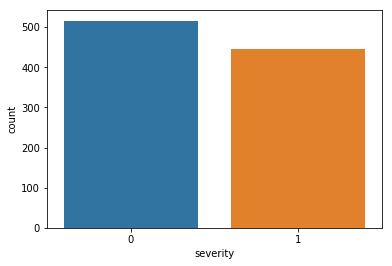

In [6]:
# 우리가 classification 해야 할 라벨 데이터가 각각 몇개 있는지 확인 ~_~ yes or no인 binary classification 문제
print(data['severity'].value_counts())
sns.countplot(x='severity', data=data)

In [7]:
# data 전처리를 통해 one_hot_encoding을 해준다.. 학습을 위해
data = pd.get_dummies(data)

In [8]:
data.head()

,severity,BI_RADS_0,BI_RADS_2,BI_RADS_3,BI_RADS_4,BI_RADS_5,BI_RADS_55,BI_RADS_6,BI_RADS_?,age_18,...,margin_2,margin_3,margin_4,margin_5,margin_?,density_1,density_2,density_3,density_4,density_?
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
# severity를 예측해야 되므로, severity data를 y로, 나머지 데이터를 x로 ...
x = data.drop('severity', axis = 1)
y = data['severity']

In [10]:
# data를 train, test data set으로 분류 하는데 비율은 train:7 test:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=77)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [12]:
# 각 모델(logistic, knn, decisiontree, randomforest, svm)별 default 값으로 학습 결과를 확인해본다. 

f1_scores = [] # f1_score를 담을 list
accuracy_score = [] # accuracy를 담을 list

# 각 모델별 default 값으로 모델을 만든다.
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dtree_model = DecisionTreeClassifier()
randomforest_model = RandomForestClassifier()
svm_model = SVC()

for model in [logistic_model, knn_model, dtree_model, randomforest_model, svm_model]:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = f1_score(y_test, predictions)
    f1_scores.append(score)
    accuracy_score.append(f1_score(y_test, predictions))

C:\Users\kimta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kimta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kimta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
f1_scores

[0.7851851851851852,
 0.7956989247311828,
 0.7049808429118773,
 0.7715355805243446,
 0.7791164658634538]

In [14]:
# logistic, knn, decisiontree, randomforest, svm 순으로 정확도 -> default는 knn이 가장 좋다??
accuracy_score

[0.7851851851851852,
 0.7956989247311828,
 0.7049808429118773,
 0.7715355805243446,
 0.7791164658634538]

# Parameter tuning<br>
`randomforest model, svm model 두 가지 모델을 tuning 할 예정임` <br>



In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': [1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001]} 

In [17]:
# SVM 모델 TUNING
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

C:\Users\kimta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.0001, gamma=1000.0 ..........................................
[CV] . C=0.0001, gamma=1000.0, score=0.5377777777777778, total=   0.0s
[CV] C=0.0001, gamma=1000.0 ..........................................
[CV] . C=0.0001, gamma=1000.0, score=0.5357142857142857, total=   0.0s
[CV] C=0.0001, gamma=1000.0 ..........................................
[CV] . C=0.0001, gamma=1000.0, score=0.5381165919282511, total=   0.0s
[CV] C=0.0001, gamma=100.0 ...........................................
[CV] .. C=0.0001, gamma=100.0, score=0.5377777777777778, total=   0.0s
[CV] C=0.0001, gamma=100.0 ...........................................
[CV] .. C=0.0001, gamma=100.0, score=0.5357142857142857, total=   0.0s
[CV] C=0.0001, gamma=100.0 ...........................................
[CV] .. C=0.0001, gamma=100.0, score=0.5381165919282511, total=   0.0s
[CV] C=0.0001, gamma=10.0 ............................................
[CV] ... C=0.00

[CV] ...... C=0.01, gamma=1.0, score=0.5377777777777778, total=   0.0s
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ...... C=0.01, gamma=1.0, score=0.5357142857142857, total=   0.0s
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ...... C=0.01, gamma=1.0, score=0.5381165919282511, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...... C=0.01, gamma=0.1, score=0.5377777777777778, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...... C=0.01, gamma=0.1, score=0.5357142857142857, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...... C=0.01, gamma=0.1, score=0.5381165919282511, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ..... C=0.01, gamma=0.01, score=0.5377777777777778, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .

[CV] .... C=1.0, gamma=0.0001, score=0.5357142857142857, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] .... C=1.0, gamma=0.0001, score=0.5381165919282511, total=   0.0s
[CV] C=10.0, gamma=1000.0 ............................................
[CV] ... C=10.0, gamma=1000.0, score=0.6311111111111111, total=   0.0s
[CV] C=10.0, gamma=1000.0 ............................................
[CV] ... C=10.0, gamma=1000.0, score=0.6517857142857143, total=   0.0s
[CV] C=10.0, gamma=1000.0 ............................................
[CV] ... C=10.0, gamma=1000.0, score=0.6457399103139013, total=   0.0s
[CV] C=10.0, gamma=100.0 .............................................
[CV] .... C=10.0, gamma=100.0, score=0.6311111111111111, total=   0.0s
[CV] C=10.0, gamma=100.0 .............................................
[CV] .... C=10.0, gamma=100.0, score=0.6517857142857143, total=   0.0s
[CV] C=10.0, gamma=100.0 .............................................
[CV] .

[CV] .... C=1000.0, gamma=1.0, score=0.8311111111111111, total=   0.0s
[CV] C=1000.0, gamma=1.0 .............................................
[CV] ................ C=1000.0, gamma=1.0, score=0.8125, total=   0.0s
[CV] C=1000.0, gamma=1.0 .............................................
[CV] .... C=1000.0, gamma=1.0, score=0.8340807174887892, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................... C=1000.0, gamma=0.1, score=0.8, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] .... C=1000.0, gamma=0.1, score=0.8348214285714286, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] .... C=1000.0, gamma=0.1, score=0.7892376681614349, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ... C=1000.0, gamma=0.01, score=0.8088888888888889, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    8.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': [1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [18]:
# 최적을 param 을 확인해보면 c는 1.0, gamma는 0.1 인것을 확인할 수 있다.
grid.best_params_

{'C': 1.0, 'gamma': 0.1}

In [19]:
preds_grid = grid.predict(x_test)

In [20]:
score_grid = f1_score(y_test, preds_grid)

In [21]:
# tuning 시 accuracy가 81.5% 까지 상승했다 ~_~
score_grid

0.8153310104529616

# Radom Forest Tuning

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 77)

estimator_param = [10, 100, 1000, 10000]
param_grid = {"n_estimators": estimator_param, "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(clf, param_grid = param_grid, refit=True, verbose=3)
grid_search.fit(x_train, y_train)

C:\Users\kimta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, score=0.8355555555555556, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, score=0.8258928571428571, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV]  criterion=gini, n_estimators=10, score=0.8026905829596412, total=   0.0s
[CV] criterion=gini, n_estimators=100 ................................
[CV]  criterion=gini, n_estimators=100, score=0.8222222222222222, total=   0.0s
[CV] criterion=gini, n_estimators=100 ................................
[CV]  criterion=gini, n_estimators=100, score=0.8348214285714286, total=   0.0s
[CV] criterion=gini, n_estimators=100 ................................
[CV]  criterion=gini, n_estimators=100, score=0.8116591928251121, total=   0.0s
[CV] criterion=gini, n_estimators=100

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   57.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=77, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 1000, 10000], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [23]:
# 최적을 param 을 확인해보면 criterion는 gini, n_estimators 1000 인것을 확인할 수 있다.
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 1000}

In [24]:
clf_pred = grid_search.predict(x_test)
clf_score = f1_score(y_test, clf_pred)

print(clf_score) # 78.7% ㅠㅠ... 

0.7870036101083031


In [25]:
# end : svm # tuning 시 accuracy가 81.5% 까지 상승했다 ~_~